# MNIST Handwritten Digits Dataset

The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form. 30 contributed to this training set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469, 1994.

Loading the Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('mnist.csv')
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
df.shape

(1797, 65)

In [4]:
df.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9', 'pixel_10', 'pixel_11',
       'pixel_12', 'pixel_13', 'pixel_14', 'pixel_15', 'pixel_16', 'pixel_17',
       'pixel_18', 'pixel_19', 'pixel_20', 'pixel_21', 'pixel_22', 'pixel_23',
       'pixel_24', 'pixel_25', 'pixel_26', 'pixel_27', 'pixel_28', 'pixel_29',
       'pixel_30', 'pixel_31', 'pixel_32', 'pixel_33', 'pixel_34', 'pixel_35',
       'pixel_36', 'pixel_37', 'pixel_38', 'pixel_39', 'pixel_40', 'pixel_41',
       'pixel_42', 'pixel_43', 'pixel_44', 'pixel_45', 'pixel_46', 'pixel_47',
       'pixel_48', 'pixel_49', 'pixel_50', 'pixel_51', 'pixel_52', 'pixel_53',
       'pixel_54', 'pixel_55', 'pixel_56', 'pixel_57', 'pixel_58', 'pixel_59',
       'pixel_60', 'pixel_61', 'pixel_62', 'pixel_63', 'label'],
      dtype='object')

In [5]:
df.label.value_counts()

label
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

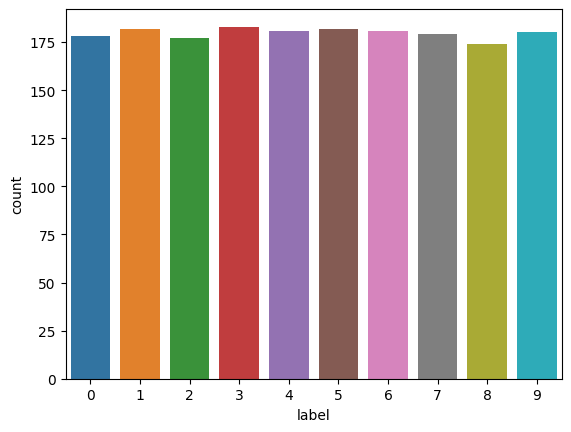

In [6]:
sns.countplot(data=df, x='label')

In [7]:
x = df.drop('label', axis=1)
y = df['label']

In [9]:
idx = np.random.randint(0,1796,9)
print(idx)

[ 260 1636  382  306    9  449  889 1104 1655]


9
[[ 0.  0. 11. 12.  0.  0.  0.  0.]
 [ 0.  2. 16. 16. 16. 13.  0.  0.]
 [ 0.  3. 16. 12. 10. 14.  0.  0.]
 [ 0.  1. 16.  1. 12. 15.  0.  0.]
 [ 0.  0. 13. 16.  9. 15.  2.  0.]
 [ 0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  0.  0.  9. 15.  4.  0.]
 [ 0.  0.  9. 12. 13.  3.  0.  0.]]


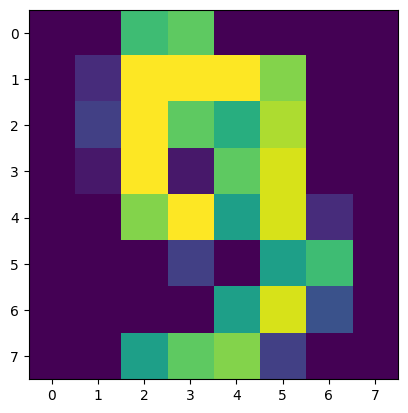

In [10]:
print(y[idx[4]])

print(np.reshape(x.values[idx[4]], (8,8)))

img = np.reshape(x.values[idx[4]], (8,8))

plt.imshow(img)

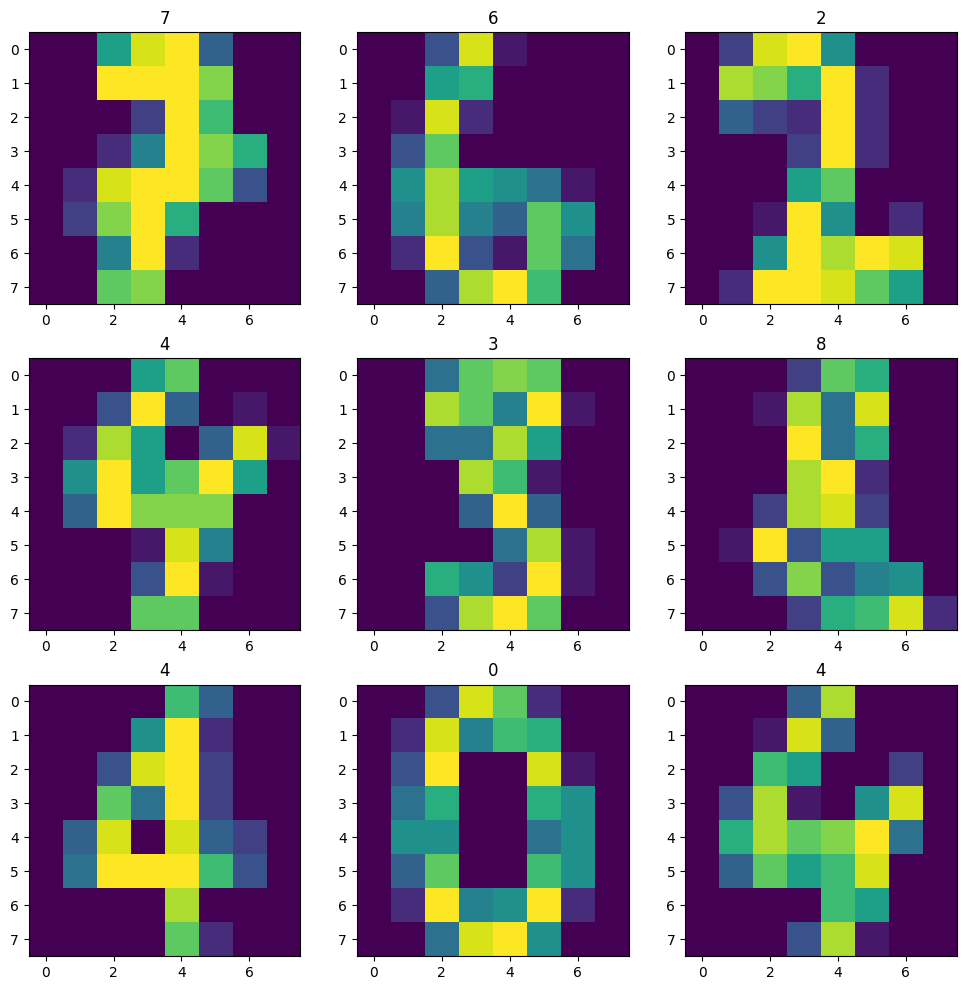

In [12]:
plt.figure(figsize=(12,12))
idx = np.random.randint(0,1786, 9)

for i in range(len(idx)):
    plt.subplot(3,3,i+1)
    plt.title(y[idx[i]])
    img_grid = np.reshape(x.values[idx[i]], (8,8))
    plt.imshow(img_grid)

Test Train Split

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

Training

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

/home/idreesy31/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Prediction

In [16]:
y_test_pred = classifier.predict(x_test)

Measuring Performance

Accuracy

In [17]:
# calculate accuracy of class predictions

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9511111111111111

Confusion Metrics

In [18]:
# print the confusion matrix
con_metrics = metrics.confusion_matrix(y_test, y_test_pred)
con_metrics

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])

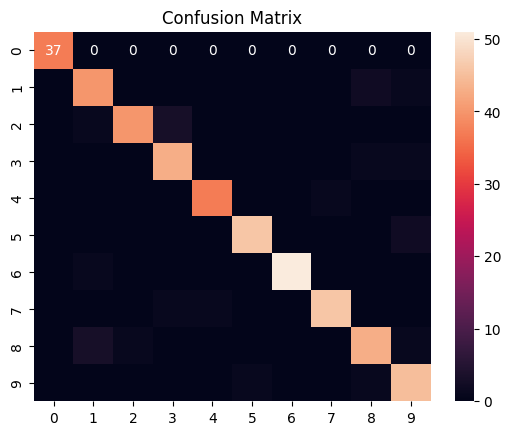

In [20]:
#ploting heatmap for confusion matrix

sns.heatmap(con_metrics, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

Classification Report

In [22]:
# checking Precision, recall and f1 score
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



Decision Tree Model

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_test_pred = dt_classifier.predict(x_test)
metrics.accuracy_score(y_test,y_test_pred)

0.8355555555555556